In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Fictitious Data

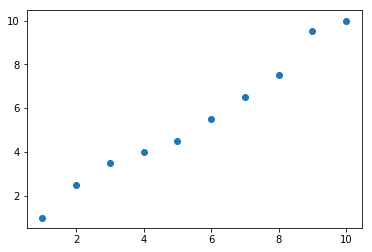

In [2]:
x_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_vals = [1, 2.5, 3.5, 4, 4.5, 5.5, 6.5, 7.5, 9.5, 10]

plt.scatter(x_vals, y_vals)

### Standardise data

In [3]:
def standardise(values):
    mean = np.mean(values)
    std =  np.std(values)
    standardised_values = [(x - mean) / std for x in values]
    return mean, std, standardised_values

def unstandardise(mean, std, values):
    return [round(x * std + mean, 15) for x in values]

x_mean, x_std, x_vals_stand = standardise(x_vals)
y_mean, y_std, y_vals_stand = standardise(y_vals)

### Gradient descent functions

In [4]:
def plot_line(x_vals, y_vals, slope, intercept, show=True):
    y_hats = []
    for x in x_vals:
        y_hat = x * slope + intercept
        y_hats.append(y_hat)
    
    plt.scatter(x_vals, y_vals, c='b') 
    plt.plot(x_vals, y_hats, c='b')
    if show == True:
        plt.show()
    

def derivative(x_vals, y_vals, slope, intercept, coeff, output=True):
    if output == True:
        print('find',coeff,'derivative')    
    costs = []
    for x, y in zip(x_vals, y_vals):
        y_hat = (x * slope) + intercept
        y_hat_minus_y = y_hat - y 
        
        ## slightly different functions for slope vs intercept
        if coeff == 'slope':
            cost = y_hat_minus_y * x
        elif coeff == 'intercept':
            cost = y_hat_minus_y
            
        costs.append(round(cost))   
    deriv = 2 * np.mean(costs)
    deriv = round(deriv, 2)
    total_cost = sum(costs)
    if output == True:
        print('costs:', costs, 'sum:', total_cost)
        print(f'{coeff} derivative:', deriv)
        print('--------------')
    return deriv

### Gradient descent animated

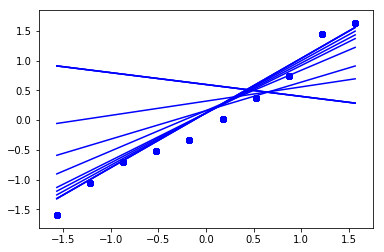

In [5]:
from matplotlib.animation import FuncAnimation

try:
    plt.rcParams["animation.html"] = "jshtml"
except ValueError:
    plt.rcParams["animation.html"] = "html5"

def grad_descent(x_vals_stand, y_vals_stand, learning_rate_a, slope, intercept, max_iter, current_iter = 0):
    if current_iter == max_iter:
        return None
    deriv_slope = derivative(x_vals_stand, y_vals_stand, slope, intercept, 'slope', output=False)
    deriv_inter = derivative(x_vals_stand, y_vals_stand, slope, intercept, 'intercept', output=False)
    slope -= learning_rate_a * deriv_slope
    intercept -= learning_rate_a * deriv_inter
    coeffs.append((slope, intercept))
    return grad_descent(x_vals_stand, y_vals_stand, learning_rate_a, slope, intercept, max_iter, current_iter + 1)
  
def plot_animation(plot_iter, coeffs):
    plot_line(x_vals_stand, y_vals_stand, coeffs[plot_iter][0], coeffs[plot_iter][1], show=False)
    
##
learning_rate_a = 0.2
slope = -1 # initial random
intercept = 1 #  initial random
max_iter = 10

coeffs = []
grad_descent(x_vals_stand, y_vals_stand, learning_rate_a, slope, intercept, max_iter)

fig = plt.figure()
anim = FuncAnimation(fig, plot_animation,
                     frames=max_iter,
                     interval=500,
                     repeat_delay=2,
                     fargs=(coeffs,),
                    )
anim

### Gradient descent implementation

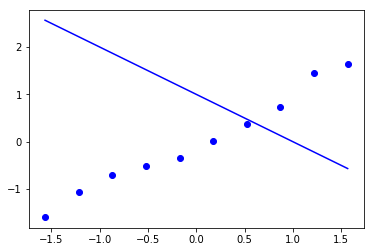

slope: -1 | intercept: 1
~~~~~~~~~~~~~~
find slope derivative
costs: [-7.0, -4.0, -2.0, -1.0, -0.0, 0.0, 0.0, -1.0, -2.0, -3.0] sum: -20.0
slope derivative: -4.0
--------------
find intercept derivative
costs: [4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 0.0, -1.0, -2.0, -2.0] sum: 10.0
intercept derivative: 2.0
--------------


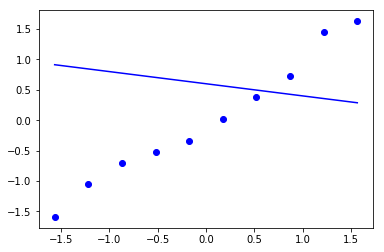

slope: -0.19999999999999996 | intercept: 0.6
~~~~~~~~~~~~~~
find slope derivative
costs: [-4.0, -2.0, -1.0, -1.0, -0.0, 0.0, 0.0, -0.0, -1.0, -2.0] sum: -11.0
slope derivative: -2.2
--------------
find intercept derivative
costs: [3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, -0.0, -1.0, -1.0] sum: 7.0
intercept derivative: 1.4
--------------


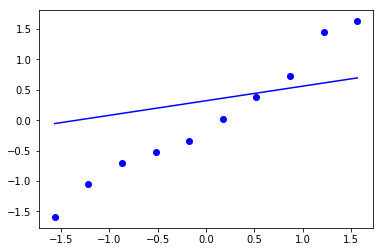

slope: 0.2400000000000001 | intercept: 0.32
~~~~~~~~~~~~~~
find slope derivative
costs: [-2.0, -1.0, -1.0, -0.0, -0.0, 0.0, 0.0, -0.0, -1.0, -1.0] sum: -6.0
slope derivative: -1.2
--------------
find intercept derivative
costs: [2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, -0.0, -1.0, -1.0] sum: 4.0
intercept derivative: 0.8
--------------


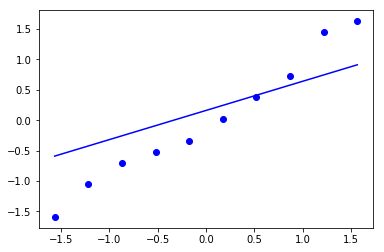

slope: 0.4800000000000001 | intercept: 0.15999999999999998
~~~~~~~~~~~~~~
find slope derivative
costs: [-2.0, -1.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -1.0, -1.0] sum: -5.0
slope derivative: -1.0
--------------
find intercept derivative
costs: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -1.0, -1.0] sum: 0.0
intercept derivative: 0.0
--------------


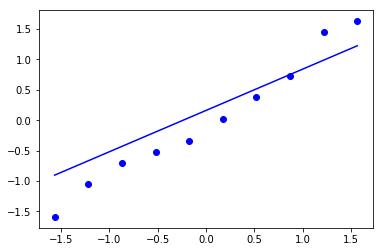

slope: 0.6800000000000002 | intercept: 0.15999999999999998
~~~~~~~~~~~~~~
find slope derivative
costs: [-1.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -1.0, -1.0] sum: -3.0
slope derivative: -0.6
--------------
find intercept derivative
costs: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 1.0
intercept derivative: 0.2
--------------


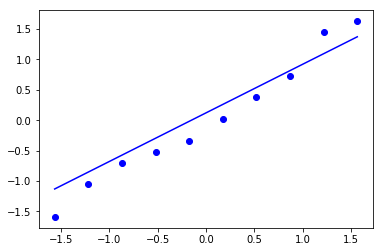

slope: 0.8000000000000002 | intercept: 0.11999999999999997
~~~~~~~~~~~~~~
find slope derivative
costs: [-1.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: -1.0
slope derivative: -0.2
--------------
find intercept derivative
costs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
intercept derivative: 0.0
--------------


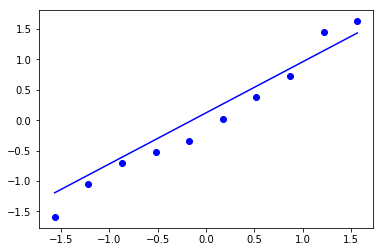

slope: 0.8400000000000002 | intercept: 0.11999999999999997
~~~~~~~~~~~~~~
find slope derivative
costs: [-1.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: -1.0
slope derivative: -0.2
--------------
find intercept derivative
costs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
intercept derivative: 0.0
--------------


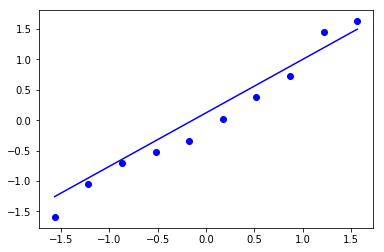

slope: 0.8800000000000002 | intercept: 0.11999999999999997
~~~~~~~~~~~~~~
find slope derivative
costs: [-1.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: -1.0
slope derivative: -0.2
--------------
find intercept derivative
costs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
intercept derivative: 0.0
--------------


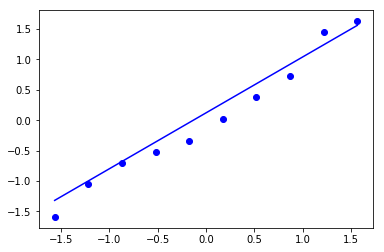

slope: 0.9200000000000003 | intercept: 0.11999999999999997
~~~~~~~~~~~~~~
find slope derivative
costs: [-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
slope derivative: 0.0
--------------
find intercept derivative
costs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
intercept derivative: 0.0
--------------


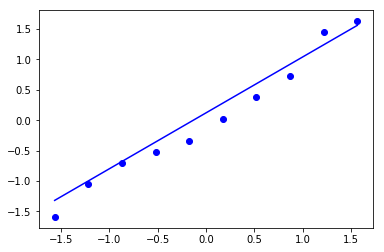

slope: 0.9200000000000003 | intercept: 0.11999999999999997
~~~~~~~~~~~~~~
find slope derivative
costs: [-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
slope derivative: 0.0
--------------
find intercept derivative
costs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0] sum: 0.0
intercept derivative: 0.0
--------------


In [6]:
learning_rate_a = 0.2
slope = -1 # initial random
intercept = 1 #  initial random

for _ in range(10):
    plot_line(x_vals_stand, y_vals_stand, slope, intercept)
    print('slope:', slope, '| intercept:', intercept)
    print('~~~~~~~~~~~~~~')
    deriv_slope = derivative(x_vals_stand, y_vals_stand, slope, intercept, 'slope')
    deriv_inter = derivative(x_vals_stand, y_vals_stand, slope, intercept, 'intercept')
    slope -= learning_rate_a * deriv_slope
    intercept -= learning_rate_a * deriv_inter

### Plot final chart with native pre-standardised data

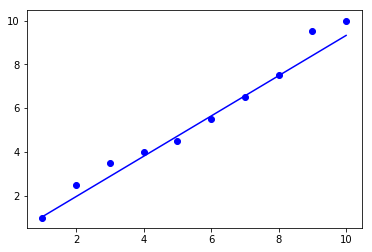

In [7]:
plot_line(x_vals, y_vals, slope, intercept)

### Surface plot of cost function

<IPython.core.display.Javascript object>


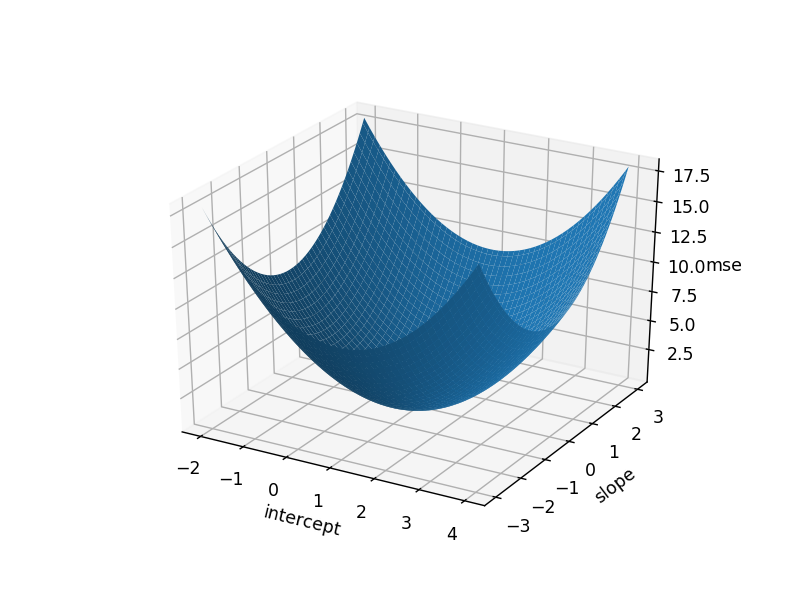

Text(0.5,0,'mse')

In [8]:
from mpl_toolkits import mplot3d
%matplotlib notebook

def mse(x_vals, y_vals, slope, intercept):
    costs = []
    for x, y in zip(x_vals, y_vals):
        y_hat = (x * slope) + intercept
        y_minus_y_hat = y - y_hat
        cost = y_minus_y_hat **2   
        costs.append(cost)   
    error = np.mean(costs)
    #print(slope,intercept,error)
    return error

theta0s = np.linspace(-2, 4, 100) # every likely intercept value
theta1s = np.linspace(-3, 3, 100) # every likely slope value
cost = np.empty(shape=(100, 100)) # empty matrix to populate with Z error values
t0s, t1s = np.meshgrid(theta0s, theta1s)
for i in range(100):
    for j in range(100):
        error = mse(x_vals_stand, y_vals_stand, t0s[i,j], t1s[i,j])
        cost[i,j] = error
 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(t0s, t1s, cost)
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
ax.set_zlabel('mse')

### OLS with numpy matrix methods
coeffs = inverse(X_tranpose * X) * X_transpose * y

In [9]:
data = pd.DataFrame(x_vals, columns=['x_values'])
data['bias'] = 1
data['target'] = pd.Series(y_vals)
X = data[['x_values','bias']]
y = data['target']
data

,x_values,bias,target
0,1,1,1.0
1,2,1,2.5
2,3,1,3.5
3,4,1,4.0
4,5,1,4.5
5,6,1,5.5
6,7,1,6.5
7,8,1,7.5
8,9,1,9.5
9,10,1,10.0


In [10]:
X_transpose_X = X.transpose().dot(X)
X_transpose_X

,x_values,bias
x_values,385,55
bias,55,10


In [11]:
inverse = np.linalg.inv(X_transpose_X)
inverse

array([[ 0.01212121, -0.06666667],
       [-0.06666667,  0.46666667]])

In [12]:
X_transpose_y = X.transpose().dot(y)
X_transpose_y

x_values    379.0
bias         54.5
dtype: float64

In [13]:
coeffs = inverse.dot(X_transpose_y)
dict(zip(['ols_slope','ols_intercept'],coeffs))

{'ols_slope': 0.9606060606060605, 'ols_intercept': 0.1666666666666643}